<img src="https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/agods/nyp_ago_logo.png" width='400'/>

Welcome to the lab! Before we get started here are a few pointers on using this notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.
    

# Basic Plots

We are going to go through the different types of simple plots. This includes bar charts, pie charts, stacked bar, and area charts, histograms, box plots, scatter plots and bubble plots. More sophisticated plots, such as violin plots, will be covered in the next exercise, using Seaborn instead of Matplotlib.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Visualizing Comparision

### Bar Chart

Bar chart can be useful for comparing numerical values across categories (categorical), e.g. 

<img src="https://github.com/nyp-sit/agods/raw/main/day3/images/barchart_comparison.png" width="70%" />

It can also be used for time-series data if the data is uncorrelated and we want to emphasize and compare individual values. 

<img src="https://github.com/nyp-sit/agods/raw/main/day3/images/barchart_timeseries.png" width='70%'/>

Here are some design considerations when using bar chart: 
- The axis corresponding to the numerical variable should start at zero. Starting with another value might be misleading, as it makes a small value difference look like a big one.
- Use horizontal label, if the number of bars is small, and the chart doesn’t look too cluttered.
- The labels can be rotated to different angles if there isn’t enough space to present them horizontally.


The [`plt.bar(x, height, [width])`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) creates a vertical bar plot. For horizontal bars, use the [`plt.barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html) function.

**Important parameters**:

- `x`: Specifies the x coordinates of the bars
- `height`: Specifies the height of the bars
- `width (optional)`: Specifies the width of all bars; the default is 0.8

In [ ]:
plt.bar(['A', 'B', 'C', 'D'], [20, 25, 40, 10])

If you want to have subcategories, you have to use the `plt.bar()` function multiple times with shifted x-coordinates. 
This is done in the following example and illustrated in the figure that follows. 
The `arange()` function is a method in the NumPy package that returns evenly spaced values within a given interval.  The `xticks()` function is used to set the x-ticks and the corresponding labels

In [ ]:
labels = ['A', 'B', 'C', 'D']

x = np.arange(len(labels))

width = 0.4

plt.bar(x - width / 2, [20, 25, 40, 10], width=width)

plt.bar(x + width / 2, [30, 15, 30, 20], width=width)

# Ticks and tick labels must be set manually

plt.xticks(x, labels)

plt.show()

#ax = plt.gca()

#ax.set_xticklabels(labels)

### Exercise

In this exercise, you will generate a bar plot to compare movie scores. You will be given five movies with scores from Rotten Tomatoes. The Tomatometer is the percentage of approved Tomatometer critics who have given a positive review for a movie. The Audience Score is the percentage of users who have given a score of 3.5 or higher, out of 5. Compare these two scores among the five movies.

The following are the steps to perform:

1. Import the necessary modules and enable plotting within a Jupyter Notebook.
2. Use pandas to read the data (movie_scores.csv) located in the datasets subfolder.
3. Use Matplotlib to create a visually appealing bar plot comparing the two scores for all five movies.
4. Use the movie titles as labels for the x-axis. Use percentages at intervals of 20 for the y-axis and minor ticks at intervals of 5. Add a legend and a suitable title to the plot.
5. Add a horizontal grid for major ticks, and add a dashed horizontal grid for minor ticks (Hint: refer to [`plt.grid()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)

The expected output is as below: 

<img src='images/ex2_output.png' width=60% />

In [1]:
## TODDO 

# Step 1: import libraries 


# Step 2: Read the dataset


# Step 3: Create a bar plot comparing two scores for 5 movies 



# Step 4: Set the x-axis labels, set the major ticks for y-axis, add title and legend


# Step 5: Add minor ticks, add dashed horizontal grid for minor ticks, add solid horizontal grid for major tick 

**Suggest Solution**

<details><summary>Click here for solution</summary>
    
```python
# Step 1: import libraries 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Step 2: Read the dataset
df = pd.read_csv('datasets/movie_scores.csv', index_col=0 )
df.head()

# Step 3: Create a bar plot comparing two scores for 5 movies 
plt.figure(figsize=(10, 5))
xpos = np.arange(len(df['MovieTitle']))
ypos = np.arange(0,101,20) 
width = 0.4
plt.bar(xpos - width / 2, df['Tomatometer'], width=width, label='Tomatometer')
plt.bar(xpos + width / 2, df['AudienceScore'], width=width, label='AudienceScore')

# Step 4: Set the x-axis labels, set the ticks for y-axis
plt.xticks(xpos, labels=df['MovieTitle'], rotation=15)
plt.yticks(ypos, labels=['0%','20%','40%','60%','80%','100%'])
plt.legend()
plt.title('Movie Comparison')

# Step 5: Add horizontal grid for major ticks, add dashed horizontal grid for minor ticks 
plt.yticks(np.arange(0, 101, 5), minor=True)
plt.grid(which='minor', axis='y', linestyle='--')
plt.grid(which='major', axis='y')

## alternative OO style
# ax = plt.gca()
# ax.set_yticks(np.arange(0, 101, 5), minor=True)
# ax.yaxis.grid(which='major')
# ax.yaxis.grid(which='minor', linestyle='--')

plt.show()

```
</details>


## Part-to-Whole Comparison 

Sometimes, we need to know not just a total, but the components that
comprise that total. While other charts like a standard bar chart can be
used to compare the values of the components, the following charts are particularly suited for part-to-whole decomposition: Pie Chart, Stacked Bar Chart and Stacked Area Plot.  

### Pie Chart

The `plt.pie(x, [explode], [labels], [autopct])` function creates a pie chart.

Important parameters:

- `x`: Specifies the slice sizes.
- `explode (optional)`: Specifies the fraction of the radius offset for each slice. The explode-array must have the same length as the x-array.
- `labels (optional)`: Specifies the labels for each slice.
- `autopct (optional)`: Shows percentages inside the slices according to the specified format string. Example: '%1.1f%%'.

In [ ]:
plt.pie([0.4, 0.3, 0.2, 0.1], 
        explode=(0.1, 0.0, 0.0, 0.0), 
        labels=['A', 'B', 'C', 'D'],
        autopct="%1.1f%%")
plt.show()

### Stacked Bar Chart

We can use stacked bar chart to show the composition and comparison of a few variables over time.  The vertical bar always adds up to 100%.  

A stacked bar chart uses the same `plt.bar()` function as bar charts. For each stacked bar, the `plt.bar()` function must be called, and the `bottom` parameter must be specified, starting with the second stacked bar.

In [ ]:
x = ['A', 'B', 'C']
bars1 = [10, 20, 30]
bars2 = [20, 15, 10]
bars3 = [5, 10, 20]
plt.bar(x, bars1)
plt.bar(x, bars2, bottom=bars1)
# now the new botton consist of the sum of bars1 and bars.  we can use np.add() to sum up the two arrays bars1 and bars2
plt.bar(x, bars3, bottom=np.add(bars1, bars2))
plt.show()

### Exercise 


In this exercise, we will use a stacked bar plot to visualize the performance of a restaurant. 

Let's look at the following scenario: 

You are the owner of a restaurant and, due to a new law, you have to introduce a No Smoking Day. To make as few losses as possible, you want to visualize how many sales are made every day, categorized by smokers and non-smokers.

Use the dataset *tips* from Seaborn, which contains multiple entries of restaurant bills, and create a matrix where the elements contain the sum of the total bills for each day and smokers/non-smokers:

*Note*

For this exercise, we will import the Seaborn library as i`import seaborn as sns`. The dataset can be loaded using this code: 
`bills = sns.load_dataset('tips')`

1. Import all the necessary dependencies and load the tips dataset. Note that we have to import the Seaborn library to load the dataset.
2. Use the given dataset and create a matrix where the elements contain the sum of the total bills for each day and split according to smokers/non-smokers.

|day|smoker|non-smoker|
|---|---|---|
|Sun|103.20|303.20|
|Mon|223.30|123.30|

3. Create a stacked bar plot, stacking the summed total bills separated according to smoker and non-smoker for each day.
4. Add a legend, labels, and a title.

After executing the preceding steps, the expected output should be as follows:

<img src='images/stacked_bar_exercise.png' width=60%/>

In [ ]:
## TODO:  Complete the code here

# Step 1:  import seaborn and load the dataset 'tips'. 



# Step 2:  Sum up the total tips grouped by day and smoker. Hint:  Use dataframe groupby() and sum() 



# Step 3:  Create a matrix where each row represents the day, and the columns are total bills of smoker and non-smoker



# Step 4:  Create a stacked bar plot, stacking the summed total bills separated according to smoker and non-smoker for each day.



# Step 5:  Add a legend, labels, and a title.

<details><summary>Click here for solution</summary>
    
```python

# Step 1:  import seaborn and load the dataset 'tips'

import seaborn as sns
import matplotlib.pyplot as plt

bills = sns.load_dataset('tips')
bills = bills.drop(['tip','sex','time', 'size'], axis=1)
bills.head()

# Step 2:  Sum up the total tips grouped by day and smoker. Hint:  Use dataframe groupby() and sum() 

groups = bills.groupby(['day','smoker'])['total_bill'].sum()
print(groups)

# Step 3:  Create a matrix where each row represents the day, and the columns are total bills of smoker and non-smoker

import numpy as np

days = ['Thur', 'Fri', 'Sat', 'Sun']
smoking = ['Yes', 'No']

# create empty array
totals = [] 

for day in days: 
    # create a row that consists of two total bills, one for smoker and one for non smoker
    total = [groups[(day, 'Yes')], groups[(day, 'No')]]
    # append the row to the array
    totals.append(total)

    # convert to numpy array (which is a 2D array or matrix)
totals = np.asarray(totals)
print(totals)

# Step 4:  Create a stacked bar plot, stacking the summed total bills separated according to smoker and non-smoker for each day.

plt.figure()
plt.bar(days, totals[:,0], label='Smoker')
plt.bar(days, totals[:,1], bottom=totals[:,0], label='Non-Smoker')
plt.ylabel('Daily total sales in $')

# Step 5: Add legend, title and grid lines
plt.grid(which='Major', axis='y')
plt.legend()
plt.title('Restaurant Performance')
plt.show()

```
</details>

### Stacked Area Chart

`plt.stackplot(x, y)` creates a stacked area plot.

Important parameters:
- `x`: Specifies the x-values of the data series.
- `y`: Specifies the y-values of the data series. For multiple series, either as a 2D array or any number of 1D arrays, call the following function: `plt.stackplot(x, y1, y2, y3, …)`.
- `labels (optional)`: Specifies the labels as a list or tuple for each data series.


In [ ]:
plt.stackplot([1, 2, 3, 4], [2, 4, 5, 8], [1, 5, 4, 2])
plt.show()

### Exercise 

In this exercise, we will compare smartphone sales units using a stacked area chart. 

Let's look at the following scenario: 

You want to invest in one of the five biggest smartphone manufacturers. Looking at the quarterly sales units as part of a whole may be a good indicator of which company to invest in:

1. Import the necessary modules 
2. Use pandas to read the smartphone_sales.csv dataset located in the Datasets subfolder.
3. Create a visually appealing stacked area chart. Add a legend, labels, and a title.

After executing the preceding steps, the expected output should be as follows:

<img src='images/stacked_plot_exercise.png' width=60% />


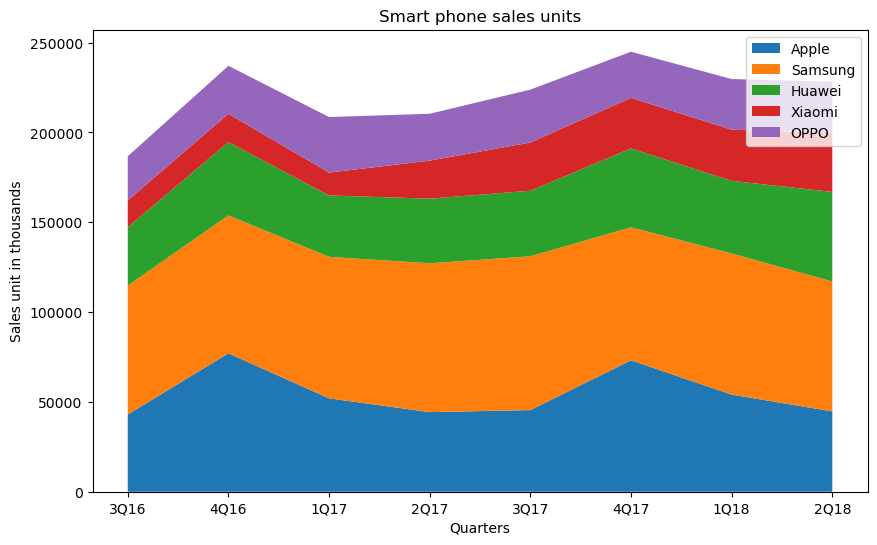

In [1]:
# Step 1: Import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Use pandas to read the smartphone_sales.csv dataset located in the Datasets subfolder.

df = pd.read_csv('datasets/smartphone_sales.csv', index_col=0)

# Step 3: Create a visually appealing stacked area chart. Add a legend, labels, and a title.

# use the column names (e.g. Apple, Samsung, etc) as labels 
labels = df.columns[1:]

plt.figure(figsize=(10, 6))
plt.stackplot(df['Quarter'], df['Apple'], df['Samsung'], df['Huawei'], df['Xiaomi'], df['OPPO'], labels=df.columns[1:])
plt.xlabel('Quarters')
plt.ylabel('Sales unit in thousands')
plt.title('Smart phone sales units')
plt.legend()
plt.show()

<details><summary>Click here for solution</summary>

```python

# Step 1: Import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Use pandas to read the smartphone_sales.csv dataset located in the Datasets subfolder.

df = pd.read_csv('datasets/smartphone_sales.csv', index_col=0)

# Step 3: Create a visually appealing stacked area chart. Add a legend, labels, and a title.

# use the column names (e.g. Apple, Samsung, etc) as labels 
labels = df.columns[1:]

plt.figure(figsize=(10, 6))
plt.stackplot(df['Quarter'], df['Apple'], df['Samsung'], df['Huawei'], df['Xiaomi'], df['OPPO'], labels=df.columns[1:])
plt.xlabel('Quarters')
plt.ylabel('Sales unit in thousands')
plt.title('Smart phone sales units')
plt.legend()
plt.show()
```
</details>

## Visualizing Distribution

Visualizing distribution allows us to examine set of quantitave values to see giw the values are distributed from lowest to highest. 
Distribution visualization can provide quick answers to many important questions:
- what range do the observations cover? 
- what is their central tendency?
- are they heavily skewed in one direction? Is there evidence for bimodality? 
- are there significant outliers? 

Histogram is commonly used for displaying single distribution, while Box plot and Violin plot are commonly used to compare distributions between groups. 

### Histogram

A histogram visualizes the distribution of a single numerical variable. Each bar represents the frequency for a certain interval. 

Histogram and bar chart might look similar but they are used differently: 
- Histograms are used to show distributions of variables while bar charts are used to compare variables. 
- Histograms plot binned quantitative data while bar charts plot categorical data. 
- Bars can be reordered in bar charts but not in histograms

Experiment with different number of bins (intervals) to select the optimal number: 
- too many intervals will result in raggedly shaped distribution which is hard to see the shape of distribution
- too few intervals will result in too much smoothing and loss of information. 

There are some guidelines on choosing the number of bins, e.g. Sturge's rule and Freedman-Diaconis rule. 

The `plt.hist(x)` function creates a histogram.
Important parameters:

- `x`: Specifies the input values.
- `bins: (optional)`: Specifies the number of bins as an integer or specifies the bin edges as a list.
- `range: (optional)`: Specifies the lower and upper range of the bins as a tuple.
- `density: (optional)`: If true, the histogram represents a probability density.

In [ ]:
plt.figure()
x = np.random.normal(0, 1, size=1000)
plt.hist(x, bins=30, density=True)
plt.show()

### Box Plot

Box plot can be used to compare distributions between groups. The box plot shows multiple statistical measurements. The box extends from the lower to the upper quartile values of the data, thereby allowing us to visualize the interquartile range. 

<img src="images/boxplot_parts.png" width=50%/>


For more details regarding the plot, refer to the previous chapter. The `plt.boxplot(x)` function creates a box plot.

**Important parameters**:

- `x`: Specifies the input data. It specifies either a 1D array for a single box, or a sequence of arrays for multiple boxes.
- `notch: (optional)` If true, notches will be added to the plot to indicate the confidence interval around the median.
- `labels: (optional)` Specifies the labels as a sequence.
- `showfliers: (optional)` By default, it is true, and outliers are plotted beyond the caps.
- `showmeans: (optional)` If true, arithmetic means are shown.

In [ ]:
plt.figure()
x1 = np.random.normal(0, 1, size=100)
x2 = np.random.normal(0, 1, size=100)
plt.boxplot([x1, x2], labels=['A', 'B'])
plt.show()

### Exercise - Using a Histogram and a Box Plot to Visualize Intelligence Quotient

In this exercise, we will visualize the intelligence quotient (IQ) of 100 applicants using histogram and box plots. 100 people have come for an interview in a company. To place an individual applicant in the overall group, a histogram and a box plot shall be used.

1. Import the necessary modules and enable plotting within a Jupyter Notebook.
2. Use the following IQ scores to create the plots:

```python
# IQ samples
iq_scores = [126, 89, 90, 101, 102, 74, 93, 101, 66, \
             120, 108, 97, 98, 105, 119, 92, 113, 81, \
             104, 108, 83, 102, 105, 111, 102, 107, 103, \
             89, 89, 110, 71, 110, 120, 85, 111, 83, 122, \
             120, 102, 84, 118, 100, 100, 114, 81, 109, 69, \
             97, 95, 106, 116, 109, 114, 98, 90, 92, 98, \
             91, 81, 85, 86, 102, 93, 112, 76, 89, 110, \
             75, 100, 90, 96, 94, 107, 108, 95, 96, 96, \
             114, 93, 95, 117, 141, 115, 95, 86, 100, 121, \
             103, 66, 99, 96, 111, 110, 105, 110, 91, 112, \
             102, 112, 75]
```
3. Plot a histogram with 10 bins for the given IQ scores. Visualize the mean as a vertical solid red line, and the standard deviation using dashed vertical lines. Add labels and a title. The expected output is as follows:

<img src='images/hist_exercise.png' width=60% />

*Note*
The `plt.axvline(x, [color=…], [linestyle=…])` function draws a vertical line at position x.

4. Create a box plot to visualize the same IQ scores. Add labels and a title. The expected output is as follows:

<img src='images/boxplot_exercise.png' width=60% />

In [ ]:
# TODO: complete the code 

# Step 1:  Import the python modules 



# Step 2:  Create an numpy array of given iq scores 



# Step 3:  Plot the histogram



# Step 4:  Plot the box plot 


<details><summary>Click here for solution</summary>

```python

# Step 1: 
import numpy as np
import matplotlib.pyplot as plt

# Step 2: 
iq_scores = np.asarray(
            [126, 89, 90, 101, 102, 74, 93, 101, 66, \
             120, 108, 97, 98, 105, 119, 92, 113, 81, \
             104, 108, 83, 102, 105, 111, 102, 107, 103, \
             89, 89, 110, 71, 110, 120, 85, 111, 83, 122, \
             120, 102, 84, 118, 100, 100, 114, 81, 109, 69, \
             97, 95, 106, 116, 109, 114, 98, 90, 92, 98, \
             91, 81, 85, 86, 102, 93, 112, 76, 89, 110, \
             75, 100, 90, 96, 94, 107, 108, 95, 96, 96, \
             114, 93, 95, 117, 141, 115, 95, 86, 100, 121, \
             103, 66, 99, 96, 111, 110, 105, 110, 91, 112, \
             102, 112, 75])

# Step 3: 

mean = iq_scores.mean()
std = iq_scores.std()
print(mean, std)
plt.hist(iq_scores, bins=10, density=False)
plt.axvline(mean, color='r', linestyle='-')
plt.axvline(mean-std, color='r', linestyle='--')
plt.axvline(mean+std, color='r', linestyle='--')
plt.xlabel('IQ Score')
plt.ylabel('frequency')
plt.title('IQ Scores for a test group of 100')
plt.show()

# Step 4:

plt.figure()
plt.boxplot(iq_scores)
plt.xlabel('Test group')
plt.ylabel('IQ Score')
plt.title('IQ Scores for a test group of 100')
plt.show()

```
</details>


## Visualizing Relationship 

One task that shows up in data exploration is understanding the relationship
between data features. The chart types below can be used to plot
two or more variables against each other to observe trends and patterns
between them: scatter plot, bubble chart, and scatterplot matrix.  We will look at scatterplot matrix when we cover Seaborn plotting library.


### Scatter Plot

Scatter plot is useful for showing relationships between two numeric variables. Each point’s position on the horizontal and vertical axes indicate value on the associated variable. 

`plt.scatter(x, y)` creates a scatter plot of y versus x, with optionally varying marker size and/or color.

**Important parameters**:

- `x, y`: Specifies the data positions.
- `s: (optional)` Specifies the marker size in points squared.
- `c: (optional)` Specifies the marker color. If a sequence of numbers is specified, the numbers will be mapped to the colors of the color map.


In [ ]:
# Generate some x,y data 
x = np.random.normal(0, 1, size=100)
y = 1 + x + np.random.normal(0, 1, size=100)

plt.figure()
plt.scatter(x, y)
plt.show()

Sometime it is useful to also plot the regression model to fit the scatter plot. It is easier to do it using Seaborn plotting library. We will see how to do it later

In [ ]:
#obtain m (slope) and b(intercept) of linear regression line, degree 1
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
plt.scatter(x, y)
plt.plot(x, m*x+b, "r")

### Exercise 

In this exercise, we will use a scatter plot to show correlation within a dataset. You are given a dataset anage_data.csv containing information about various animals. Visualize the correlation between attributes Maximum longevity (yrs) and Body mass (g) of different Class of animals such as Amphibia, Aves, etc.

Create a scatter plot visualizing the correlation between the body mass and the maximum longevity. Use different colors for grouping data samples according to their class. Add a legend, labels and a title. Use a log scale for both the x-axis and y-axis.

In [ ]:
# Step 1: Import the necessary packages


# Step 2: Import the dataset from 'datasets/anage_data.csv' 


# Step 3: Create a subset that only contains 'Class', 'Maximum longevity (yrs)', and  'Body mass (g)' 


# Step 4: Drop any rows that contain Null values. Find out how many Classes of animals are left in the remaining data


# Step 5: Create individual dataframes for each animal Class. 


# Step 6: Create scatter plot of longevity and body mass for each of the animal class. Use different colors for different class. 


# Step 7: Add legend, title and change the x and y axis to log scale.


<details><summary>Click here for solution</summary>

```python
# Step 1: Import the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Import the dataset from 'datasets/anage_data.csv'. Display the info of the dataset

df = pd.read_csv('datasets/anage_data.csv')
print(df.info())

# Step 3: Create a subset that only contains 'Class', 'Maximum longevity (yrs)', and  'Body mass (g)' 

BODY_MASS = 'Body mass (g)'
LONGEVITY = 'Maximum longevity (yrs)'
df_filtered = df[['Class', LONGEVITY,  BODY_MASS]]


# Step 4: Drop any rows that contain Null values. Find out how many Classes of animals are left in the remaining data

df_filtered = df_filtered.dropna()
print(df_filtered['Class'].value_counts())

# Step 5: Create individual dataframes for each animal Class. 

df_amphibia = df_filtered[df_filtered['Class'] == 'Amphibia'] 
df_aves = df_filtered[df_filtered['Class'] == 'Aves'] 
df_reptilia = df_filtered[df_filtered['Class'] == 'Reptilia'] 
df_mammalia = df_filtered[df_filtered['Class'] == 'Mammalia']


# Step 6: Create scatter plot of longevity and body mass for each of the animal class. Use different colors for different class. 

plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(df_amphibia[BODY_MASS], df_amphibia[LONGEVITY], label='Amphibia')
plt.scatter(df_aves[BODY_MASS], df_aves[LONGEVITY], label='Aves')
plt.scatter(df_reptilia[BODY_MASS], df_reptilia[LONGEVITY], label='Reptilia')
plt.scatter(df_mammalia[BODY_MASS], df_mammalia[LONGEVITY], label='Mammalia')

# Step 7: Add legend, label x and y axis and set x and y axis to log scale.
plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
plt.xscale('log')
plt.yscale('log')
plt.legend()

```
    
</details>

Is there any correlation between between median income and median house price? If there is, is it a positive or negative correlation?

Let's get some information about the different columns and see if there is any missing values.

### Bubble Plot

The plt.scatter function can also be used to create a bubble plot, to visualize a third or fourth variable. The parameters `s` (scale) and `c` (color) are used for this purpose.

In [ ]:
x = np.random.normal(0, 1, size=100)
y = np.random.normal(0, 1, size=100)
z = np.random.normal(0, 1, size=100)
c = np.random.normal(0, 1, size=100)
plt.figure()
plt.scatter(x, y, s=z*500, c=c, alpha=0.5)
plt.colorbar()
plt.show()